# Intergal using Line Equation from Stock Histocial Data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sympy import *

import warnings
warnings.filterwarnings("ignore") 

# yfinance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [ ]:
# input
symbol = 'AMD'
start = '2017-01-01'
end = '2019-01-01'

# Read data 
dataset = yf.download(symbol,start,end)['Adj Close']

# View Columns
dataset.head()

[*********************100%***********************]  1 of 1 completed


Date
1980-03-17    3.145833
1980-03-18    3.031250
1980-03-19    3.041667
1980-03-20    3.010417
1980-03-21    2.916667
Name: Adj Close, dtype: float64

In [ ]:
df = dataset.reset_index()

In [ ]:
df.head()

,Date,Adj Close
0,1980-03-17,3.145833
1,1980-03-18,3.031250
2,1980-03-19,3.041667
3,1980-03-20,3.010417
4,1980-03-21,2.916667


In [ ]:
df.tail()

,Date,Adj Close
10748,2022-10-31,60.060001
10749,2022-11-01,59.660000
10750,2022-11-02,58.630001
10751,2022-11-03,60.110001
10752,2022-11-04,61.384102


In [ ]:
max_p = df['Adj Close'].max()
min_p = df['Adj Close'].min()
avg_p = df['Adj Close'].mean()

In [ ]:
data = df.drop(['Date'], axis=1)
data

,Adj Close
0,3.145833
1,3.031250
2,3.041667
3,3.010417
4,2.916667
...,...
10748,60.060001
10749,59.660000
10750,58.630001
10751,60.110001


In [ ]:
data = data.reset_index()

In [ ]:
data.values

array([[0.00000000e+00, 3.14583302e+00],
       [1.00000000e+00, 3.03125000e+00],
       [2.00000000e+00, 3.04166698e+00],
       ...,
       [1.07500000e+04, 5.86300011e+01],
       [1.07510000e+04, 6.01100006e+01],
       [1.07520000e+04, 6.13841019e+01]])

In [ ]:
from numpy import ones,vstack
from numpy.linalg import lstsq

In [ ]:
points = data.values

In [ ]:
x_coords, y_coords = zip(*points)
A = vstack([x_coords,ones(len(x_coords))]).T
m, c = lstsq(A, y_coords)[0]


In [ ]:
print("Line Equation is y = {m}x + {c}".format(m=m,c=c))


Line Equation is y = 0.0029511538644523727x + 0.16992127372346488


In [ ]:
equation_of_line = print("y = {m}x + {c}".format(m=m,c=c))


y = 0.0029511538644523727x + 0.16992127372346488


In [ ]:
equation = print("{m}*x + {c}".format(m=m,c=c))

0.0029511538644523727*x + 0.16992127372346488


In [ ]:
x = Symbol('x')

In [ ]:
integrate(0.021718614923358828*x+9.372574584656501, x)

0.0108593074616794*x**2 + 9.3725745846565*x

In [ ]:
integrate(0.0108593074616794*x**2 + 9.3725745846565 * x, x)

0.00361976915389313*x**3 + 4.68628729232825*x**2

# Univariate roots and fixed points

In [ ]:
def f(x):
    return 0.00361976915389313*x**3 + 4.68628729232825 * x**2

In [ ]:
x = df['Adj Close']

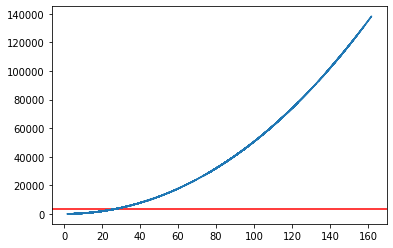

In [ ]:
plt.axhline((f(x)).mean(), c='red')
plt.plot(x, f(x))